<!-- File automatically generated using DocOnce (https://github.com/doconce/doconce/):
doconce format ipynb poisson3d.do.txt  -->

# Demo - 3D Poisson's equation
**Mikael Mortensen** (email: `mikaem@math.uio.no`), Department of Mathematics, University of Oslo.

Date: **April 13, 2018**

**Summary.** This is a demonstration of how the Python module [shenfun](https://github.com/spectralDNS/shenfun) can be used to solve a 3D Poisson
equation in a 3D tensor product domain that has homogeneous Dirichlet boundary
conditions in one direction and periodicity in the
remaining two. The solver described runs with MPI without any further
considerations required from the user. Spectral convergence, as shown in [Figure 1](#fig:3d:ct0), is demonstrated.
The demo is implemented in slightly more generic terms (more boundary conditions) in
[poisson3D.py](https://github.com/spectralDNS/shenfun/blob/master/demo/poisson3D.py), and the numerical method is is described in more detail by J. Shen [[shen1]](#shen1) and [[shen95]](#shen95).

<!-- dom:FIGURE: [https://rawgit.com/spectralDNS/spectralutilities/master/figures/poisson3D_errornorm.png] Convergence of 3D Poisson solvers for both Legendre and Chebyshev modified basis function. <a id="fig:3d:ct0"></a> -->
<!-- begin figure -->
<a id="fig:3d:ct0"></a>

<img src="https://rawgit.com/spectralDNS/spectralutilities/master/figures/poisson3D_errornorm.png" ><p style="font-size: 0.9em"><i>Figure 1: Convergence of 3D Poisson solvers for both Legendre and Chebyshev modified basis function.</i></p>
<!-- end figure -->

## Poisson's equation
<a id="demo:poisson3d"></a>

Poisson's equation is given as

<!-- Equation labels as ordinary links -->
<a id="eq:3d:poisson"></a>

$$
\begin{equation}
\nabla^2 u(\boldsymbol{x}) = f(\boldsymbol{x}) \quad \text{for }\, \boldsymbol{x}=(x, y, z) \in \Omega, \label{eq:3d:poisson} \tag{1}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto1"></a>

$$
\begin{equation}  
u(\pm 1 ,y, z) =0, 
\label{_auto1} \tag{2}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto2"></a>

$$
\begin{equation}  
u(x, 2\pi, z) = u(x, 0, z), 
\label{_auto2} \tag{3}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto3"></a>

$$
\begin{equation}  
u(x, y, 2\pi) = u(x, y, 0),
\label{_auto3} \tag{4}
\end{equation}
$$

where $u(\boldsymbol{x})$ is the solution and $f(\boldsymbol{x})$ is a function. The domain
$\Omega = (-1, 1)\times [0, 2\pi)^2$.

To solve Eq. ([1](#eq:3d:poisson)) with the Galerkin method we will make use of
smooth basis functions, $v(\boldsymbol{x})$, that satisfy the given boundary
conditions. To this end we will use one basis function for the $x$-direction,
$\mathcal{X}(x)$,
one for the $y$-direction, $\mathcal{Y}(y)$, and one for the $z$-direction,
$\mathcal{Z}(z)$. And
then we create three-dimensional basis functions like

$$
v(x, y, z) = \mathcal{X}(x) \mathcal{Y}(y) \mathcal{Z} (z).
$$

The basis functions $\mathcal{Y}(y)$ and $\mathcal{Z}(z)$ are chosen as Fourier exponentials, since these
functions are periodic. Likewise, the basis functions $\mathcal{X}(x)$ are chosen as
modified Legendre or Chebyshev polynomials, using $\phi_l(x)$ to refer to either
one

<!-- Equation labels as ordinary links -->
<a id="_auto4"></a>

$$
\begin{equation}
\mathcal{X}_l(x) = \phi_l(x) - \phi_{l+2}(x), \forall \, l \in \boldsymbol{l}^{N_0},
\label{_auto4} \tag{5}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto5"></a>

$$
\begin{equation}  
\mathcal{Y}_m(y) =  e^{\imath m y}, \forall \, m \in \boldsymbol{m}^{N_1}, 
\label{_auto5} \tag{6}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto6"></a>

$$
\begin{equation}  
\mathcal{Z}_n(z) = e^{\imath n z}, \forall \, n \in \boldsymbol{n}^{N_2},
\label{_auto6} \tag{7}
\end{equation}
$$

where the size of the discretized problem is $\boldsymbol{N} = (N_0, N_1, N_2)$,
$\boldsymbol{l}^{N_0} = (0, 1, \ldots, N_0-3)$, $\boldsymbol{m}^{N_1} =
(-N_1/2, -N_1/2+1, \ldots, N_1/2-1)$ and $\boldsymbol{n}^{N_2} = (-N_2/2, -N_2/2+1,
\ldots, N_2/2-1)$. However, due to [Hermitian symmetry](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.fft.rfft.html#numpy.fft.rfft), we only store $N_2/2+1$
wavenumbers in the $z$-direction, such that $\boldsymbol{n}^{N_2} = (0, 1, \ldots,
N_2/2)$. We refer to the Cartesian wavenumber mesh on vector form as $\boldsymbol{k}$:

$$
\boldsymbol{k} = \{(l, m, n)\, | \,(l, m, n)  \in \boldsymbol{l}^{N_0} \times \boldsymbol{m}^{N_1} \times \boldsymbol{n}^{N_2}\}.
$$

We have the one-dimensional spaces

<!-- Equation labels as ordinary links -->
<a id="_auto7"></a>

$$
\begin{equation}
V^{N_0} = \text{span}\{ \mathcal{X}_l \}_{l\in\boldsymbol{l}^{N_0}}, 
\label{_auto7} \tag{8}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto8"></a>

$$
\begin{equation}  
V^{N_1} = \text{span}\{ \mathcal{Y}_m \}_{m\in\boldsymbol{m}^{N_1}}, 
\label{_auto8} \tag{9}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto9"></a>

$$
\begin{equation}  
V^{N_2} = \text{span}\{ \mathcal{Z}_n \}_{n\in\boldsymbol{n}^{N_2}},
\label{_auto9} \tag{10}
\end{equation}
$$

and from these we create a tensor product space $W^{\boldsymbol{N}}(\boldsymbol{x})$

<!-- Equation labels as ordinary links -->
<a id="_auto10"></a>

$$
\begin{equation}
W^{\boldsymbol{N}}(\boldsymbol{x}) = V^{N_0}(x) \otimes V^{N_1}(y) \otimes V^{N_2}(z).
\label{_auto10} \tag{11}
\end{equation}
$$

And then we look for discrete solutions $u \in W^{\boldsymbol{N}}$ like

<!-- Equation labels as ordinary links -->
<a id="eq:3d:u"></a>

$$
\begin{equation}
u(\boldsymbol{x}) = \sum_{l\in \boldsymbol{l}^{N_0}} \sum_{m\in \boldsymbol{m}^{N_1}}\sum_{n\in
\boldsymbol{n}^{N_2}}\hat{u}_{lmn} \mathcal{X}_l(x) \mathcal{Y}_m(y) \mathcal{Z}_n(z), \label{eq:3d:u} \tag{12} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto11"></a>

$$
\begin{equation}  
 = \sum_{\boldsymbol{\textsf{k}} \in \boldsymbol{k}}\hat{u}_{\boldsymbol{\textsf{k}}} v_{\boldsymbol{\textsf{k}}}(\boldsymbol{x}),
\label{_auto11} \tag{13}
\end{equation}
$$

where $\hat{u}_{lmn}$ are components of the expansion coefficients for $u$ and
the second form, $\{\hat{u}_{\boldsymbol{\textsf{k}}}\}_{\boldsymbol{\textsf{k}}\in\boldsymbol{k}}$, is a shorter,
simplified notation, with sans-serif $\boldsymbol{\textsf{k}}=(l, m, n)$.
The expansion coefficients are the unknowns in the spectral Galerkin method.

We now formulate a variational problem using the Galerkin method: Find $u \in
W^{\boldsymbol{N}}$ such that

<!-- Equation labels as ordinary links -->
<a id="eq:3d:varform"></a>

$$
\begin{equation}
\int_{\Omega} \nabla^2 u \, \overline{v} \, w\, \boldsymbol{dx} = \int_{\Omega} f \,
\overline{v}\, w\, \boldsymbol{dx} \quad
\forall v \, \in \, W^{\boldsymbol{N}}. \label{eq:3d:varform} \tag{14}
\end{equation}
$$

Here $\boldsymbol{dx}=dxdydz$, and the overline represents a complex conjugate, which is needed here because
the Fourier exponentials are complex functions.
The weighted integrals, weighted by $w(\boldsymbol{x})$, are called inner products, and a common notation is

<!-- Equation labels as ordinary links -->
<a id="_auto12"></a>

$$
\begin{equation}
\int_{\Omega} u \, \overline{v} \, w\, \boldsymbol{dx} = \langle u, v\rangle _w.
\label{_auto12} \tag{15}
\end{equation}
$$

The integral can either be computed exactly, or with quadrature. The advantage
of the latter is that it is faster (through Fast Fourier transforms),
and that non-linear terms may be computed just as quickly as linear.
For a linear problem, it does not make much of a difference, if any at all.
Approximating the integral with quadrature, we obtain

$$
\begin{align*}
\int_{\Omega} u \, \overline{v} \, w\, \boldsymbol{dx} &\approx \langle u, v
\rangle_w^{\boldsymbol{N}},  \\ 
&\approx \sum_{i=0}^{N_0-1} \sum_{j=0}^{N_1-1}\sum_{k=0}^{N_2-1} u(x_i, y_j, z_k) \overline{v}(x_i, y_j, z_k) w_{i}w_jw_k,
\end{align*}
$$

where $\{w_i\}_{i=0}^{N_0-1}$, $\{w_j\}_{j=0}^{N_1-1}$, $\{w_k\}_{k=0}^{N_2-1}$ now are the quadrature weights for the three different directions. The quadrature points
$\{x_i\}_{i=0}^{N_0-1}$ are specific to the chosen basis, and even within basis there
are two different choices based on which quadrature rule is selected, either
Gauss or Gauss-Lobatto. The quadrature points for the Fourier bases are simply
uniformly distributed throughout the domain.

Inserting for test function ([12](#eq:3d:u)) and trialfunction
$v_{pqr} = \mathcal{X}_{p} \mathcal{Y}_q \mathcal{Z}_r$ on the
left hand side of ([14](#eq:3d:varform)), we get (with summation on repeated indices
to avoid too much clutter)

$$
\begin{align*}
\langle \nabla^2u, v \rangle_w^{\boldsymbol{N}} &= \left\langle \nabla^2\sum_{l\in \boldsymbol{l}^{N_0}}
\sum_{m\in \boldsymbol{m}^{N_1}}\sum_{n\in \boldsymbol{n}^{N_2}}\hat{u}_{lmn}
\mathcal{X}_{l} \mathcal{Y}_m \mathcal{Z}_n,
\mathcal{X}_{p} \mathcal{Y}_q \mathcal{Z}_r \right\rangle_w^{\boldsymbol{N}}, \\ 
    &= \left[\left(\mathcal{X}_l^{''}, \mathcal{X}_p \right)_w^N - (m^2+n^2)\left(\mathcal{X}_l, \mathcal{X}_p \right)_w^N  \right]\delta_{mq} \delta_{nr} \hat{u}_{lmn}, \\ 
    &= \left( a_{pl} - (m^2 + n^2)b_{pl}\right) \hat{u}_{lqr}, \quad \forall (p,q,r) \in \boldsymbol{k},
\end{align*}
$$

where the notation $(\cdot, \cdot)_w^{N_0}$

<!-- Equation labels as ordinary links -->
<a id="_auto13"></a>

$$
\begin{equation}
b_{pl} = \left( \mathcal{X}_l, \mathcal{X}_p \right)_w^{N_0} = \sum_{i=0}^{N_0-1} \mathcal{X}_l(x_i)
\mathcal{X}_p(x_i) w(x_i),
\label{_auto13} \tag{16}
\end{equation}
$$

is used to represent a discrete $L_2$ inner product along only the first, nonperiodic,
direction. The delta functions above come from integrating over the two periodic
directions, where we use constant weight functions $w=1/(2\pi)$ in the
inner products

<!-- Equation labels as ordinary links -->
<a id="eq:delta0"></a>

$$
\begin{equation}
\int_0^{2\pi} \mathcal{Y}_m(y) \overline{\mathcal{Y}}_q(y) \frac{1}{2\pi} dy = \delta_{mq}, \label{eq:delta0} \tag{17}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:delta1"></a>

$$
\begin{equation}
\int_0^{2\pi} \mathcal{Z}_n(z) \overline{\mathcal{Z}}_r(z) \frac{1}{2\pi} dz = \delta_{nr}. \label{eq:delta1} \tag{18}
\end{equation}
$$

The Kronecker delta-function $\delta_{ij}$ is one for $i=j$ and
zero otherwise.

The right hand side of Eq. ([14](#eq:3d:varform)) is computed as

<!-- Equation labels as ordinary links -->
<a id="_auto14"></a>

$$
\begin{equation}
\tilde{f}_{pqr} = \left\langle f, \mathcal{X}_{p}
\mathcal{Y}_q \mathcal{Z}_r  \right \rangle_w^{\boldsymbol{N}},
\label{_auto14} \tag{19}
\end{equation}
$$

where a tilde is used because this is not a complete transform of the function
$f$, but only an inner product.

The linear system of equations to solve for the expansion coefficients can now
be found as follows

<!-- Equation labels as ordinary links -->
<a id="eq:AB"></a>

$$
\begin{equation}
\left(a_{lp} - (m^2+n^2)b_{lp}\right) \hat{u}_{pmn} =
\tilde{f}_{lmn}\quad \forall \, (l,m,n) \in \boldsymbol{k}. \label{eq:AB} \tag{20}
\end{equation}
$$

Now, when $\hat{\boldsymbol{u}} = \{\hat{u}_{\boldsymbol{\textsf{k}}}\}_{\boldsymbol{\textsf{k}} \in \boldsymbol{k}}$ is
found by solving this linear system over the
entire computational mesh, it may be
transformed to real space $u(\boldsymbol{x})$ using ([12](#eq:3d:u)). Note that the matrices
$A \in \mathbb{R}^{N_0-2 \times N_0-2}$ and $B \in \mathbb{R}^{N_0-2 \times N_0-2}$
differ for Legendre or Chebyshev bases, but
for either case they have a
special structure that allows for a solution to be found very efficiently
in the order of $\mathcal{O}(N_0-3)$ operations given $m$ and $n$, see
[[shen1]](#shen1) and [[shen95]](#shen95). Fast solvers for ([20](#eq:AB)) are implemented in `shenfun` for both bases.

### Method of manufactured solutions

In this demo we will use the method of manufactured
solutions to demonstrate spectral accuracy of the `shenfun` bases. To
this end we choose a smooth analytical function that satisfies the given boundary
conditions:

<!-- Equation labels as ordinary links -->
<a id="eq:3d:u_e"></a>

$$
\begin{equation}
u_e(x, y, z) = \left(\cos(4x) + \sin(2y) + \sin(4z)\right)(1-x^2). \label{eq:3d:u_e} \tag{21}
\end{equation}
$$

Sending $u_e$ through the Laplace operator, we obtain the right hand side

<!-- Equation labels as ordinary links -->
<a id="eq:3d:solution"></a>

$$
\begin{equation}
 \nabla^2 u_e(x,y,z) = -16(1 - x^2) \cos(4 x) + 16 x \sin(4 x) - 2 \cos(4 x)
                  - (1-x^2)(4 \sin(2y) + 16\sin(4z)).  \label{eq:3d:solution} \tag{22}
\end{equation}
$$

Now, setting $f_e(\boldsymbol{x}) = \nabla^2 u_e(\boldsymbol{x})$ and solving for $\nabla^2
u(\boldsymbol{x}) = f_e(\boldsymbol{x})$, we can compare the numerical solution $u(\boldsymbol{x})$ with
the analytical solution $u_e(\boldsymbol{x})$ and compute error norms.

## Implementation

### Preamble

We will solve the Poisson problem using the [shenfun](https://github.com/spectralDNS/shenfun) Python module. The first thing needed
is then to import some of this module's functionality
plus some other helper modules, like [Numpy](https://numpy.org) and [Sympy](https://sympy.org):

In [1]:
from sympy import symbols, cos, sin, exp, lambdify
import numpy as np
from shenfun.tensorproductspace import TensorProductSpace
from shenfun import inner, div, grad, TestFunction, TrialFunction, Function, \
    project, Dx, FunctionSpace, comm, Array, chebyshev, dx, la

We use `Sympy` for the manufactured solution and `Numpy` for testing. MPI for
Python (`mpi4py`) is required for running the solver with MPI.

### Manufactured solution

The exact solution $u_e(x, y, z)$ and the right hand side $f_e(x, y, z)$ are created using `Sympy` as follows

In [2]:
x, y, z = symbols("x,y,z")
ue = (cos(4*x) + sin(2*y) + sin(4*z))*(1-x**2)
fe = ue.diff(x, 2) + ue.diff(y, 2) + ue.diff(z, 2)

These solutions are now valid for a continuous domain. The next step is thus to
discretize, using the computational mesh

$$
(x_i, y_j, z_k)\, \forall \, (i, j, k) \in [0, 1,\ldots, N_0-1] \times [0, 1, \ldots, N_1-1] \times [0, 1, \ldots, N_2-1]
$$

and a finite number of basis functions.

Note that it is not mandatory to use `Sympy` for the manufactured solution. Since the
solution is known ([22](#eq:3d:solution)), we could just as well simply use `Numpy`
to compute $f_e$. However, with `Sympy` it is much
easier to experiment and quickly change the solution.

### Discretization and MPI

We create three function spaces with given size, one for each dimension of the problem.
From these three spaces a [TensorProductSpace](https://shenfun.readthedocs.io/en/latest/shenfun.html#shenfun.tensorproductspace.TensorProductSpace) is created.

In [3]:
# Size of discretization
N = [14, 15, 16]

SD = FunctionSpace(N[0], 'Chebyshev', bc=(0, 0))
#SD = FunctionSpace(N[0], 'Legendre', bc=(0, 0))
K1 = FunctionSpace(N[1], 'Fourier', dtype='D')
K2 = FunctionSpace(N[2], 'Fourier', dtype='d')
T = TensorProductSpace(comm, (SD, K1, K2), axes=(0, 1, 2))
X = T.local_mesh()

Note that we can either choose a Legendre or a Chebyshev basis for the
nonperiodic direction. The
[TensorProductSpace](https://shenfun.readthedocs.io/en/latest/shenfun.html#shenfun.tensorproductspace.TensorProductSpace) class takes an MPI communicator as first argument and the
computational mesh is distributed internally using the `pencil` method. The
`T.local_mesh` method returns the mesh local to each processor. The `axes`
keyword determines the order of transforms going back and forth between real and
spectral space. With `axes=(0, 1, 2)` and a forward transform (from real space
to spectral, i.e., from $u$ to $\hat{u}$) axis 2 is transformed first and then 1
and 0, respectively.

The manufactured solution is created with Dirichlet boundary conditions in the
$x$-direction, and for this reason `SD` is the first space in `T`. We could just
as well have put the nonperiodic direction along either $y$- or $z$-direction,
though, but this would then require that the order of the transformed axes be
changed as well. For example, putting the Dirichlet direction along $y$, we
would need to create the tensorproductspace as

```Python
        T = TensorProductSpace(comm, (K1, SD, K2), axes=(1, 0, 2))
```

such that the Dirichlet direction is the last to be transformed. The reason for
this is that only the Dirichlet direction leads to matrices that need to be
inverted (or solved). And for this we need the entire data array along the Dirichlet
direction to be local to the processor. If the `SD` basis is the last to be
transformed, then the data will be aligned in this direction, whereas the other
two directions may both, or just one of them, be distributed.

Note that `X` is a list containing local values of the arrays $\{x_i\}_{i=0}^{N_0-1}$,
$\{y_j\}_{j=0}^{N_1-1}$ and $\{z_k\}_{k=0}^{N_2-1}$.
Now, it's not possible to run a jupyter notebook with more than one process,
but we can imagine running [the complete solver](https://github.com/spectralDNS/shenfun/blob/master/demo/poisson3D.py)
with 4 procesors and a processor mesh of shape $2\times 2$.
We would then get the following local slices for
each processor in spectral space

```Python
        print(comm.Get_rank(), T.local_slice())
        3 [slice(0, 14, None), slice(8, 15, None), slice(5, 9, None)]
        1 [slice(0, 14, None), slice(0, 8, None), slice(5, 9, None)]
        2 [slice(0, 14, None), slice(8, 15, None), slice(0, 5, None)]
        0 [slice(0, 14, None), slice(0, 8, None), slice(0, 5, None)]
```

where the global shape is $\boldsymbol{N}=(14, 15, 9)$ after taking advantage of
Hermitian symmetry in the $z$-direction. So, all processors have the complete first dimension available locally, as they
should. Furthermore, processor three owns the slices from $8:15$ and $5:9$ along
axes $y$ and $z$, respectively. Processor 2 owns slices $0:8$ and $0:5$ etc. In
real space the mesh is distributed differently. First of all the global mesh
shape is $\boldsymbol{N}=(14, 15, 16)$, and it is distributed along the first two
dimensions. The local slices can be inspected as

```Python
        print(comm.Get_rank(), T.local_slice(False))
        0 [slice(0, 7, None), slice(0, 8, None), slice(0, 16, None)]
        1 [slice(0, 7, None), slice(8, 15, None), slice(0, 16, None)]
        2 [slice(7, 14, None), slice(0, 8, None), slice(0, 16, None)]
        3 [slice(7, 14, None), slice(8, 15, None), slice(0, 16, None)]
```

Since two directions are distributed, both in spectral and real space, we say
that we have a two-dimensional decomposition (here a $2\times 2$ shaped
processor mesh) and the
MPI distribution is of type *pencil*. It is also possible to choose a *slab*
decomposition, where only one dimension of the array is distributed. This choice
needs to be made when creating the tensorproductspace as

```Python
        T = TensorProductSpace(comm, (SD, K1, K2), axes=(0, 1, 2), slab=True)
```

which would lead to a mesh that is distributed along $x$-direction in real space
and $y$-direction in spectral space. The local slices would then be

        print(comm.Get_rank(), T.local_slice()) # spectral space
        1 [slice(0, 14, None), slice(4, 8, None), slice(0, 9, None)]
        2 [slice(0, 14, None), slice(8, 12, None), slice(0, 9, None)]
        0 [slice(0, 14, None), slice(0, 4, None), slice(0, 9, None)]
        3 [slice(0, 14, None), slice(12, 15, None), slice(0, 9, None)]
        print(comm.Get_rank(), T.local_slice(False)) # real space
        3 [slice(11, 14, None), slice(0, 15, None), slice(0, 16, None)]
        0 [slice(0, 4, None), slice(0, 15, None), slice(0, 16, None)]
        2 [slice(8, 11, None), slice(0, 15, None), slice(0, 16, None)]
        1 [slice(4, 8, None), slice(0, 15, None), slice(0, 16, None)]


Note that the *slab* decomposition is usually the fastest choice. However, the maximum
number of processors with *slab* is $\min \{N_0, N_1\}$, whereas a *pencil*
approach can be used with up to $\min \{N_1(N_2/2+1), N_0 N_1\}$ processors.

### Variational formulation

The variational problem ([14](#eq:3d:varform)) can be assembled using `shenfun`'s
form language, which is perhaps surprisingly similar to FEniCS.

In [4]:
u = TrialFunction(T)
v = TestFunction(T)
# Get f on quad points
fj = Array(T, buffer=fe)
# Compute right hand side of Poisson equation
f_hat = inner(v, fj)
# Get left hand side of Poisson equation
matrices = inner(v, div(grad(u)))

The Laplacian operator is recognized as `div(grad)`. The `matrices` object is a
list of two tensor product matrices, stored as instances of the class [TPMatrix](https://shenfun.readthedocs.io/en/latest/shenfun.html#shenfun.matrixbase.TPMatrix).
The two tensor product matrices represents

$$
a_{pl} \delta_{mq} \delta_{nr}\, \text{ and }\, -(m^2 + n^2)b_{pl} \delta_{mq} \delta_{nr}
$$

from Eqs. ([20](#eq:AB)), ([17](#eq:delta0)) and ([18](#eq:delta1)).
The second matrix ($-(m^2 + n^2)b_{pl} \delta_{mq} \delta_{nr}$) has an
attribute `scale` that is equal to $-(m^2+n^2)$.
This `scale` is stored as a numpy array of shape $(1, 15, 9)$, representing the set
$\{-(m^2+n^2): (m, n) \in \boldsymbol{m}^{N_1} \times \boldsymbol{n}^{N_2}\}$. Note that $\boldsymbol{n}^{N_2}$ is stored
simply as an array of length $N_2/2+1$ (here 9), since the transform in direction $z$
takes a real signal and transforms it taking advantage of Hermitian symmetry,
see [rfft](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.fft.rfft.html).

### Solve linear equations

Finally, solve linear equation system and transform solution from spectral
$\hat{u}_{\boldsymbol{\textsf{k}}}$ vector to the real space $u(\boldsymbol{x})$ and then check how the solution corresponds with the exact solution $u_e$.

In [5]:
# Create Helmholtz linear algebra solver
Solver = chebyshev.la.Helmholtz
#Solver = la.SolverGeneric1ND # For Legendre
H = Solver(matrices)

# Solve and transform to real space
u_hat = Function(T)           # Solution spectral space
u_hat = H(u_hat, f_hat)       # Solve
uq = T.backward(u_hat)

# Compare with analytical solution
uj = Array(T, buffer=ue)
error = comm.reduce(np.linalg.norm(uj-uq)**2)
if comm.Get_rank() == 0:
    print("Error=%2.16e" %(np.sqrt(error)))

Error=4.3371671652836383e+01


### Convergence test

To do a convergence test we will now create a function `main`, that takes the
number of quadrature points as parameter, and prints out
the error.

In [6]:
def main(N, family='Chebyshev'):
    Solver = chebyshev.la.Helmholtz if family.lower() == 'chebyshev' else la.SolverGeneric1ND
    SD = FunctionSpace(N, family=family, bc=(0, 0))
    K1 = FunctionSpace(N, family='F', dtype='D')
    K2 = FunctionSpace(N, family='F', dtype='d')
    T = TensorProductSpace(comm, (SD, K1, K2), axes=(0, 1, 2))

    u = TrialFunction(T)
    v = TestFunction(T)

    # Get f on quad points
    fj = Array(T, buffer=fe)

    # Compute right hand side of Poisson's equation
    f_hat = Function(T)
    f_hat = inner(v, fj, output_array=f_hat)
    if family == 'legendre':
        f_hat *= -1.

    # Get left hand side of Poisson equation
    if family.lower() == 'chebyshev':
        matrices = inner(v, div(grad(u)))
    else:
        matrices = inner(grad(v), grad(u))

    # Create Helmholtz linear algebra solver
    H = Solver(matrices)

    # Solve and transform to real space
    u_hat = Function(T)           # Solution spectral space
    u_hat = H(f_hat, u_hat)       # Solve

    uj = Array(T)
    uj = u_hat.backward(uj)

    # Compare with analytical solution
    ua = Array(T, buffer=ue)
    #l2_error = np.linalg.norm(uj-ua)
    L2_error = np.sqrt(dx((uj-ua)**2))
    return L2_error

For example, we find the error of a Chebyshev discretization
using 12 quadrature points as

In [7]:
main(12, 'Chebyshev')

0.0007817843191356134

To get the convergence we call `main` for a list
of $N=[12, 16, \ldots, 48]$, and collect the errornorms in
arrays to be plotted. The error can be plotted using
[matplotlib](https://matplotlib.org), and the generated
figure is also shown in this demos summary.

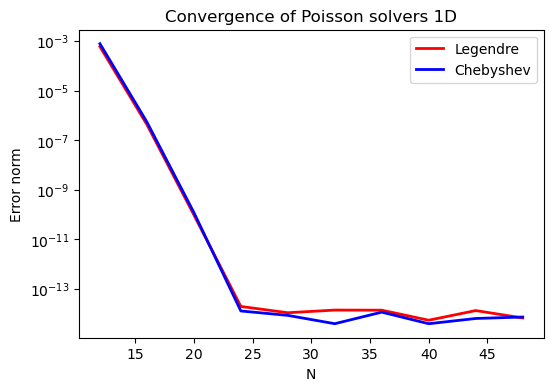

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

N = range(12, 50, 4)
error = {}
for basis in ('legendre', 'chebyshev'):
    error[basis] = []
    for i in range(len(N)):
        errN = main(N[i], basis)
        error[basis].append(errN)

plt.figure(figsize=(6, 4))
for basis, col in zip(('legendre', 'chebyshev'), ('r', 'b')):
    plt.semilogy(N, error[basis], col, linewidth=2)
plt.title('Convergence of Poisson solvers 1D')
plt.xlabel('N')
plt.ylabel('Error norm')
plt.legend(('Legendre', 'Chebyshev'))
plt.show()

The spectral convergence is evident and we can see that
after $N=24$ roundoff errors dominate as the errornorm trails off around $10^{-14}$.

## Complete solver
<a id="sec:complete"></a>

A complete solver, that can use any family of bases (Chebyshev, Legendre, Jacobi, Chebyshev second kind),
and any kind of boundary condition, can be found [here](https://github.com/spectralDNS/shenfun/blob/master/demo/poisson3D.py).

<!-- ======= Bibliography ======= -->

1. <a id="shen1"></a> **J. Shen**.  Efficient Spectral-Galerkin Method I. Direct Solvers of Second- and Fourth-Order Equations Using Legendre Polynomials, *SIAM Journal on Scientific Computing*, 15(6), pp. 1489-1505, [doi: 10.1137/0915089](https://dx.doi.org/10.1137/0915089), 1994.

2. <a id="shen95"></a> **J. Shen**.  Efficient Spectral-Galerkin Method II. Direct Solvers of Second- and Fourth-Order Equations Using Chebyshev Polynomials, *SIAM Journal on Scientific Computing*, 16(1), pp. 74-87, [doi: 10.1137/0916006](https://dx.doi.org/10.1137/0916006), 1995.